In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from utils import GAESMLP, splitDataset, scatter_data


In [5]:
circles = pd.read_csv("circles.csv", header=None)
moons = pd.read_csv("moons.csv", header=None)
classes = pd.read_csv("classes.csv", header=None)

In [6]:
df_circles = splitDataset(circles.iloc[:,:-1].values, circles.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_moons = splitDataset(moons.iloc[:,:-1].values, moons.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])
df_classes = splitDataset(classes.iloc[:,:-1].values, classes.iloc[:,-1].values[...,np.newaxis], [0.7,0.15,0.15])

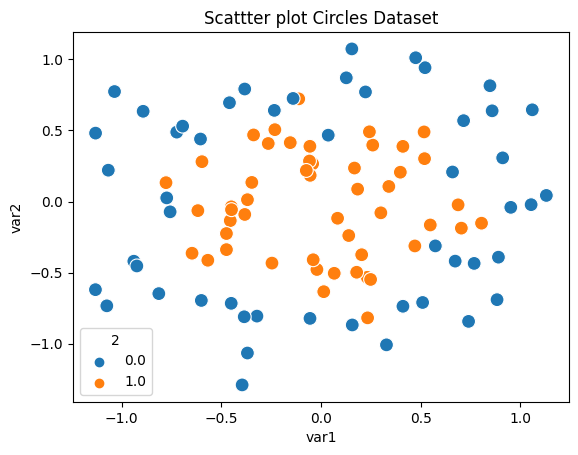

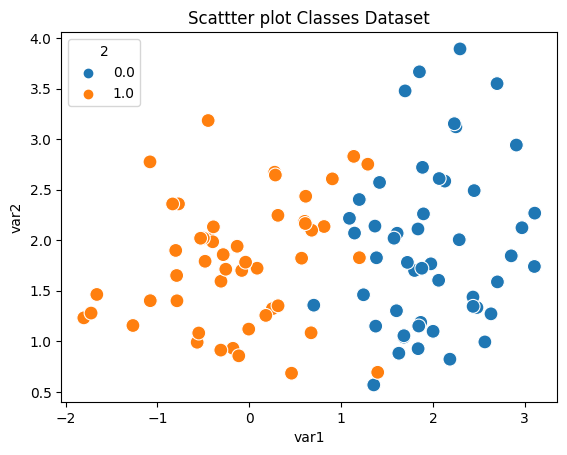

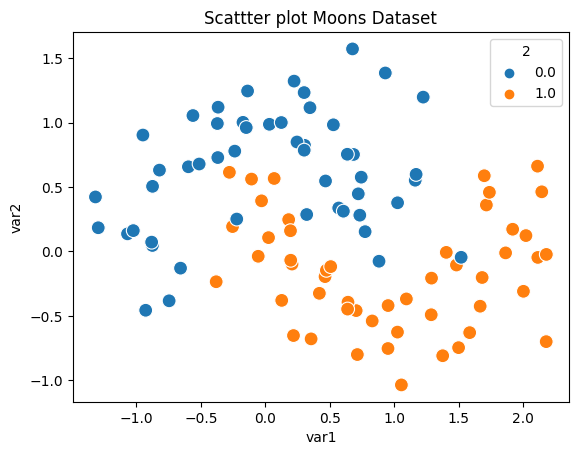

In [7]:
#Plotting the syntetic initial datasets, with an increasing complexity
scatter_data(circles, var1='var1', var2='var2', datasetName='Circles')
scatter_data(classes, var1='var1', var2='var2', datasetName='Classes')
scatter_data(moons, var1='var1', var2='var2', datasetName='Moons')

In [25]:
model = [2,4,4,1]

es = GAESMLP(model, 'ES' ,40, 0.2, 0.3, 0.995, 1)
es.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
es.evaluate(df_classes['X_test'], df_classes['y_test'])

iter 10. reward: -0.506065
iter 20. reward: -0.314248
iter 30. reward: -1.307273
iter 40. reward: -0.232393
iter 50. reward: -0.187838
iter 60. reward: -0.246378
iter 70. reward: -0.135325
iter 80. reward: -0.131079
iter 90. reward: -0.114106
iter 100. reward: -0.132688
1/1 [==============================] - 0s 37ms/step
Validation loss: 7.7467518985416    Validation acc:  0.9333333333333333
1/1 [==============================] - 0s 26ms/step


0.8

In [27]:
model = [2,4,4,1]

es = GAESMLP(model, 'GA', 10, 250, 5, 0.995, 1)
es.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
es.evaluate(df_classes['X_test'], df_classes['y_test'])

Generation = 1
Fitness    = 2.609695689338941
Generation = 2
Fitness    = 2.754600546242686
Generation = 3
Fitness    = 3.4219277188282735
Generation = 4
Fitness    = 3.4219277188282735
Generation = 5
Fitness    = 3.4219277188282735
Generation = 6
Fitness    = 3.4219277188282735
Generation = 7
Fitness    = 3.4219277188282735
Generation = 8
Fitness    = 4.229055558036776
Generation = 9
Fitness    = 4.229055558036776
Generation = 10
Fitness    = 4.229055558036776
Generation = 11
Fitness    = 5.191318979916333
Generation = 12
Fitness    = 5.191318979916333
Generation = 13
Fitness    = 5.561151351734461
Generation = 14
Fitness    = 5.561151351734461
Generation = 15
Fitness    = 5.561151351734461
Generation = 16
Fitness    = 6.8158943371083
Generation = 17
Fitness    = 6.8158943371083
Generation = 18
Fitness    = 6.8158943371083
Generation = 19
Fitness    = 6.8158943371083
Generation = 20
Fitness    = 6.8158943371083
Generation = 21
Fitness    = 6.8158943371083
Generation = 22
Fitness    = 

0.9333333333333333

In [35]:
model = [2,4,4,1]

es = GAESMLP(model, 'BP' , 0.5, 0.9, True)
es.fit(df_classes['X_train'], df_classes['y_train'], X_val = df_classes['X_val'], y_val = df_classes['y_val'], verbose = True)
es.evaluate(df_classes['X_test'], df_classes['y_test'])

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7425 - accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7391 - accuracy: 0.1143
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7357 - accuracy: 0.1143
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7334 - accuracy: 0.1143
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.1286
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7280 - accuracy: 0.1286
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7259 - accuracy: 0.1571
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7243 - accuracy: 0.1571
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7224 - accuracy: 0.1714
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.1714
Epoch 11/100
3/3 [===========

0.5333333333333333

In [12]:
from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# data = load_digits() 

# n_samples = len(data.images)
# X = data.images.reshape((n_samples, -1))
# y = data['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = MLPClassifier()

In [65]:
Integer(2, 30).sample()

9

In [ ]:


param_grid = {'hidden_layers_sizes': [(5,), (10,), (50,), (100,)],
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

# cv = StratifiedKFold(n_splits=3, shuffle=True) #No necesitamos correr Kfolds

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

In [124]:
import numpy as np
from evostra import EvolutionStrategy
from evostra.models import FeedForwardNetwork

# A feed forward neural network with input size of 5, two hidden layers of size 4 and output of size 3
model = FeedForwardNetwork(layer_sizes=[2, 4, 4, 1])

In [125]:
solution = np.array([0.5])
inp = np.asarray([1, 2])

def get_reward(weights):
    global solution, model, inp
    model.set_weights(weights)
    prediction = model.predict(inp)
    # here our best reward is zero
    reward = -np.sum(np.square(solution - prediction))
    return reward

In [126]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.]])]

In [127]:
# if your task is computationally expensive, you can use num_threads > 1 to use multiple processes;
# if you set num_threads=-1, it will use number of cores available on the machine; Here we use 1 process as the
#  task is not computationally expensive and using more processes would decrease the performance due to the IPC overhead.
es = EvolutionStrategy(model.get_weights(), get_reward, population_size=20, sigma=0.1, learning_rate=0.03, decay=0.995, num_threads=1)
es.run(5, print_step=1)

iter 1. reward: -0.247383
iter 2. reward: -0.216245
iter 3. reward: -0.146427
iter 4. reward: -0.059915
iter 5. reward: -0.005048


In [31]:
optimized_weights = es.get_weights()
model.set_weights(optimized_weights)

In [214]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [215]:
model.compile(
    loss = BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# Train the model
history = model.fit(
    df_classes['X_train'], df_classes['y_train'], epochs=200,
    validation_data = (df_classes['X_val'], df_classes['y_val']),
    verbose=0
)

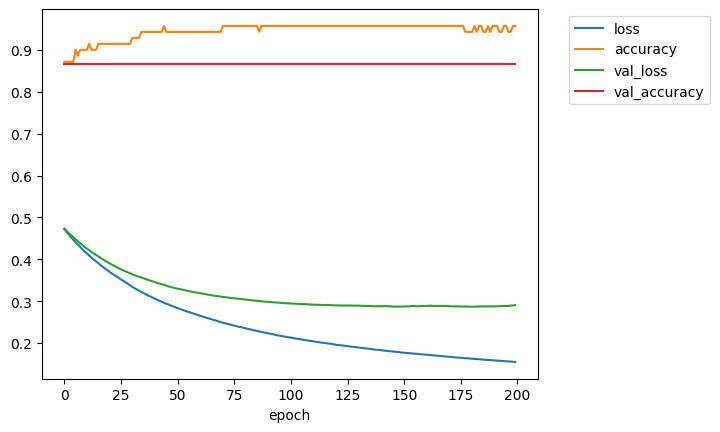

In [216]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [213]:
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense 
# declaring model
basic_model = Sequential()

# Adding layers to the model
# First layers: 16 neurons/perceptrons that takes the input and uses 'sigmoid' activation function.
basic_model.add(Dense(units = 16 , activation = 'sigmoid', input_shape = (2,))) 
# Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'
basic_model.add(Dense(1, activation = 'hard_sigmoid'))
sgd = keras.optimizers.SGD(lr=0.5, momentum=0.9, nesterov=True)
basic_model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
basic_model.fit(df_classes['X_train'], df_classes['y_train'], epochs=100)
loss_and_metrics = basic_model.evaluate(df_classes['X_val'], df_classes['y_val'])
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])



Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6429
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6714
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.6857
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6857
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.7571
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.8000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.8000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.8000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.8000
Epoch 11/100
3/3 [===========

In [194]:
df_classes['y_test']

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [185]:
model.predict(df_classes['X_train'])

3/3 [==============================] - 0s 0s/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [95]:
df_classes['X_train'].T.shape

(2, 70)

In [173]:
p= model.predict(df_classes['X_train'])

3/3 [==============================] - 0s 2ms/step


In [74]:
c = df_classes['y_train']

In [76]:
bce(p, c).numpy()

0.503204434039084

In [176]:
lays = {layer.name: layer.get_weights() for layer in model.layers}

In [177]:
lays

{'dense_120': [array([[1., 1., 1., 1.],
         [1., 1., 1., 1.]], dtype=float32),
  array([1., 1., 1., 1.], dtype=float32)],
 'dense_121': [array([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]], dtype=float32),
  array([1., 1., 1., 1.], dtype=float32)],
 'dense_122': [array([[1.],
         [1.],
         [1.],
         [1.]], dtype=float32),
  array([1.], dtype=float32)]}

In [175]:
[model.get_layer(layName).set_weights([np.ones_like(item) for item in v]) for layName, v in lays.items()]

[None, None, None]

In [120]:
[w for layer in model.layers for w in layer.get_weights()]

[array([[-0.45340586, -0.2616179 ,  0.6871648 ,  0.9751673 ],
        [-0.976007  ,  0.15620422,  0.55940795, -0.0183208 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.04238242, -0.4285084 , -0.8589443 ,  0.19934589],
        [ 0.44692034, -0.78616315,  0.19346458, -0.53952074],
        [ 0.08287019, -0.10507739,  0.80188257, -0.17159128],
        [-0.7450027 ,  0.78083545, -0.6481439 ,  0.11291337]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.83909845],
        [ 0.8599671 ],
        [-0.95885664],
        [-0.82704604]], dtype=float32),
 array([0.], dtype=float32)]

In [119]:
model.set_weights(w)

In [112]:
w = [w for layer in model.layers for w in layer.get_weights()]

In [114]:
w

[array([[-0.45340586, -0.2616179 ,  0.6871648 ,  0.9751673 ],
        [-0.976007  ,  0.15620422,  0.55940795, -0.0183208 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.04238242, -0.4285084 , -0.8589443 ,  0.19934589],
        [ 0.44692034, -0.78616315,  0.19346458, -0.53952074],
        [ 0.08287019, -0.10507739,  0.80188257, -0.17159128],
        [-0.7450027 ,  0.78083545, -0.6481439 ,  0.11291337]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.83909845],
        [ 0.8599671 ],
        [-0.95885664],
        [-0.82704604]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
g = [1,2,3,4,5]
for i in g[1:-1]:
    print(i)

2
3
4


[autoreload of utils failed: Traceback (most recent call last):
  File "c:\Users\mario\anaconda3\envs\CI\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\mario\anaconda3\envs\CI\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "c:\Users\mario\anaconda3\envs\CI\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "c:\Users\mario\Github\UPC\CI - Computational Intelligence\Assignment 2\utils.py", line 95
    for i in model[1:-1]
                        

In [8]:
import numpy as np
from evostra import EvolutionStrategy
from evostra.models import FeedForwardNetwork
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(2),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


#Now we define our get_reward function:


solution = df_classes['y_train']
inp = df_classes['X_train']
bce = BinaryCrossentropy(from_logits=False)

#model.predict(inp)

def get_reward(weights):
    global solution, model, inp, bce
    #print(f'Set weights: {weights}')
    model.set_weights(weights)
    prediction = model.predict(inp, verbose=0)
    #prediction =  [0.0 if i>0.5 else 1.0 for i in prediction]
    #print(f'Get weights {[w for layer in model.layers for w in layer.get_weights()]}')
    # here our best reward is zero
    reward = -bce(solution, prediction).numpy()
    #print(reward)
    #reward = -np.sum(np.square(solution - prediction))
    return reward

#Now we can build the EvolutionStrategy object and run it for some iterations:


# if your task is computationally expensive, you can use num_threads > 1 to use multiple processes;
# if you set num_threads=-1, it will use number of cores available on the machine; Here we use 1 process as the
# task is not computationally expensive and using more processes would decrease the performance due to the IPC overhead.
es = EvolutionStrategy([w for layer in model.layers for w in layer.get_weights()], get_reward, population_size=40, sigma=0.2, learning_rate=0.3, decay=0.995, num_threads=1)
es.run(100, print_step=10)


iter 10. reward: -1.185728
iter 20. reward: -0.161477
iter 30. reward: -0.157527
iter 40. reward: -0.132556
iter 50. reward: -0.158748
iter 60. reward: -0.152790
iter 70. reward: -0.104755
iter 80. reward: -0.257649
iter 90. reward: -0.147666
iter 100. reward: -0.111688


In [9]:
optimized_weights = es.get_weights()
model.set_weights(optimized_weights)

In [10]:
pr = [0.0 if i<0.5 else 1.0 for i in model.predict(df_classes['X_train'])]
prval = [0.0 if i<0.5 else 1.0 for i in model.predict(df_classes['X_val'])]
prtest = [0.0 if i<0.5 else 1.0 for i in model.predict(df_classes['X_test'])]

1/1 [==============================] - 0s 27ms/step


In [13]:
accuracy_score(pr, df_classes['y_train']), accuracy_score(prval, df_classes['y_val']), accuracy_score(prtest, df_classes['y_test'])

(0.9714285714285714, 0.9333333333333333, 0.9333333333333333)

numpy.int32

In [12]:
# Example 1: (batch_size = 1, number of samples = 4)
y_true = [0, 1, 0, 0]
y_pred = [-18.6, 0.51, 2.94, -12.8]
bce = BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred).numpy()

0.865458

In [14]:
y_pred.dtype

AttributeError: 'list' object has no attribute 'dtype'

Generation = 1
Fitness    = 1.4997104442391762
Generation = 2
Fitness    = 1.516101240467031
Generation = 3
Fitness    = 1.516101240467031
Generation = 4
Fitness    = 1.6344829603449607
Generation = 5
Fitness    = 1.6344829603449607
Generation = 6
Fitness    = 1.8399144430838639
Generation = 7
Fitness    = 1.8399144430838639
Generation = 8
Fitness    = 2.036107420719152
Generation = 9
Fitness    = 2.036107420719152
Generation = 10
Fitness    = 2.4426791421492204
Generation = 11
Fitness    = 2.4822124449691247
Generation = 12
Fitness    = 2.4822124449691247
Generation = 13
Fitness    = 2.5887678614975025
Generation = 14
Fitness    = 2.5887678614975025
Generation = 15
Fitness    = 2.6472291125298786
Generation = 16
Fitness    = 2.6472291125298786
Generation = 17
Fitness    = 2.6472291125298786
Generation = 18
Fitness    = 2.6472291125298786
Generation = 19
Fitness    = 2.6472291125298786
Generation = 20
Fitness    = 2.6933070403040604
Generation = 21
Fitness    = 2.6933070403040604
Gener

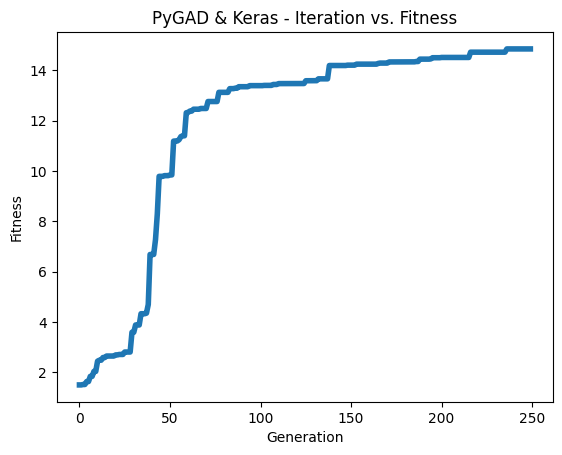

Fitness value of the best solution = 14.849734656204134
Index of the best solution : 0
3/3 [==============================] - 0s 5ms/step
Predictions : 
 [[0.00749637]
 [0.00749637]
 [0.9999467 ]
 [0.9999774 ]
 [0.43185392]
 [0.00749637]
 [0.2156744 ]
 [0.00749637]
 [0.00749637]
 [0.32380372]
 [0.00749637]
 [0.01553594]
 [0.00749637]
 [0.9999728 ]
 [0.9998582 ]
 [0.9999777 ]
 [0.00749637]
 [0.00749637]
 [0.00749637]
 [0.99996644]
 [0.09428319]
 [0.00749637]
 [0.00749637]
 [0.9999729 ]
 [0.00749637]
 [0.99996835]
 [0.13133731]
 [0.00749637]
 [0.00749637]
 [0.9999693 ]
 [0.99997747]
 [0.9999467 ]
 [0.00749637]
 [0.00749637]
 [0.99997866]
 [0.99995375]
 [0.00749637]
 [0.00749637]
 [0.9999739 ]
 [0.00749637]
 [0.9999467 ]
 [0.34000406]
 [0.00749637]
 [0.9999467 ]
 [0.00749637]
 [0.99995565]
 [0.00749637]
 [0.99990934]
 [0.9999575 ]
 [0.9999467 ]
 [0.15427211]
 [0.9999549 ]
 [0.9999467 ]
 [0.9999717 ]
 [0.00749637]
 [0.9999552 ]
 [0.9999467 ]
 [0.99996436]
 [0.9999716 ]
 [0.9999776 ]
 [0.99

In [16]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad
import tensorflow as tf

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs, verbose=0)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(2),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = df_classes['X_train']

# Data outputs
data_outputs = df_classes['y_train']

num_generations = 250
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

bce = tensorflow.keras.losses.BinaryCrossentropy()
abs_error = bce(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

In [18]:
pr = [0.0 if i<0.5 else 1.0 for i in model.predict(df_classes['X_train'])]
prval = [0.0 if i<0.5 else 1.0 for i in model.predict(df_classes['X_val'])]
prtest = [0.0 if i<0.5 else 1.0 for i in model.predict(df_classes['X_test'])]

1/1 [==============================] - 0s 22ms/step


In [21]:
accuracy_score(pr, df_classes['y_train']), accuracy_score(prval, df_classes['y_val']), accuracy_score(prtest, df_classes['y_test'])

(0.9714285714285714, 0.8666666666666667, 1.0)

Generation = 1
Fitness    = 3.111915193082475
Generation = 2
Fitness    = 3.111915193082475
Generation = 3
Fitness    = 3.111915193082475
Generation = 4
Fitness    = 3.111915193082475
Generation = 5
Fitness    = 3.111915193082475
Generation = 6
Fitness    = 3.111915193082475
Generation = 7
Fitness    = 3.5591541135891727
Generation = 8
Fitness    = 3.912678984298037
Generation = 9
Fitness    = 3.912678984298037
Generation = 10
Fitness    = 3.912678984298037
Generation = 11
Fitness    = 3.912678984298037
Generation = 12
Fitness    = 3.912678984298037
Generation = 13
Fitness    = 3.912678984298037
Generation = 14
Fitness    = 3.912678984298037
Generation = 15
Fitness    = 3.912678984298037
Generation = 16
Fitness    = 3.912678984298037
Generation = 17
Fitness    = 3.912678984298037
Generation = 18
Fitness    = 3.912678984298037
Generation = 19
Fitness    = 3.912678984298037
Generation = 20
Fitness    = 3.912678984298037
Generation = 21
Fitness    = 4.152419923226768
Generation = 22
Fitne

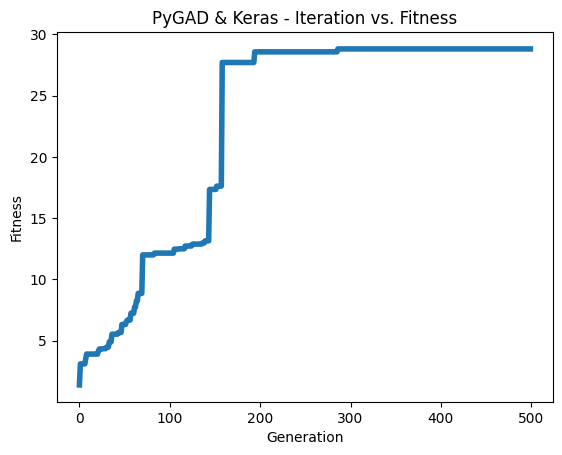

Fitness value of the best solution = 28.813289231938914
Index of the best solution : 0
1/1 [==============================] - 0s 25ms/step
Predictions : 
 [[0.10028213]
 [0.47893786]
 [1.3148257 ]
 [2.4973452 ]]
Absolute Error :  0.034706198


In [4]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs, verbose=0)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(3)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.array([[0.02, 0.1, 0.15],
                           [0.7, 0.6, 0.8],
                           [1.5, 1.2, 1.7],
                           [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = numpy.array([[0.1],
                            [0.6],
                            [1.3],
                            [2.5]])

num_generations = 500
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

In [1]:
import pygad.kerasga
help(pygad.kerasga)

Help on package pygad.kerasga in pygad:

NAME
    pygad.kerasga

PACKAGE CONTENTS
    kerasga

VERSION
    1.0.0

FILE
    c:\users\mario\anaconda3\envs\ci\lib\site-packages\pygad\kerasga\__init__.py




In [3]:
import numpy
import pygad.nn

# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([0,
                            1,
                            1,
                            0])

# The number of inputs (i.e. feature vector length) per sample
num_inputs = data_inputs.shape[1]
# Number of outputs per sample
num_outputs = 2

#Number of hidden layer neurons
HL1_neurons = 2

# Building the network architecture.
input_layer = pygad.nn.InputLayer(num_inputs)
hidden_layer1 = pygad.nn.DenseLayer(num_neurons=HL1_neurons, previous_layer=input_layer, activation_function="relu")
output_layer = pygad.nn.DenseLayer(num_neurons=num_outputs, previous_layer=hidden_layer1, activation_function="softmax")

# Training the network.
pygad.nn.train(num_epochs=10,
               last_layer=output_layer,
               data_inputs=data_inputs,
               data_outputs=data_outputs,
               learning_rate=0.01)

# Using the trained network for predictions.
predictions = pygad.nn.predict(last_layer=output_layer, data_inputs=data_inputs)

# Calculating some statistics
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print(f"Number of correct classifications : {num_correct}.")
print(f"Number of wrong classifications : {num_wrong.size}.")
print(f"Classification accuracy : {accuracy}.")

ModuleNotFoundError: No module named 'pygad'